In [94]:
# loads path to your input files : base_processed, base_raw, base_models...
%run init_notebook.py

In [95]:
my_data_file = 'dummy_fin_data_v02.csv'

In [96]:
import pandas as pd
# Read the CSV file into a new DataFrame
df = pd.read_csv(base_raw + my_data_file)

# Display the new DataFrame
print(df)

  host item_id  subpart pocket     type geography  amount
0  Brs     NaN      NaN     AV      act        US    1000
1  Brs     NaN      NaN     AV      act     India      80
2  Brs     NaN      NaN    liv      2.5       NaN     500
3  Brs     NaN      NaN    liv  2.5*0.7       NaN     900
4  Frt     NaN      NaN    PEA      act     world    2900
5  Frt     NaN      NaN    CTO      act        US     900
6  Lxa  remake      1.0     AV      scp        NL     500
7  Lxa  remake      2.0     AV      scp    France     300
8  Lxa  remake      3.0     AV      scp   Germany      50


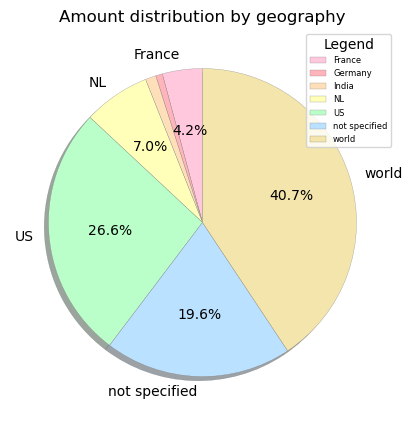

In [103]:
import matplotlib.pyplot as plt

# Replace NaN values in 'geography' with 'not specified'
df['geography'] = df['geography'].fillna('not specified')

# Group the data by 'geography' and sum the 'amount'
grouped_data = df.groupby('geography')['amount'].sum()

pastel_colors = [
    '#FFC8DD', '#FFB3BA', '#FFDFBA', '#FFFFBA', '#BAFFC9', '#BAE1FF', '#F3E5AB', '#AFE1AF', '#AFCBFF',  # soft pastels
    '#FFCCE4', '#FFE1A8', '#FFFFD1', '#C2F0C2', '#C4E4FF',
    '#FFADC4', '#FFDDCC', '#FFF9CC', '#B6F3B6', '#B3D9FF'
]

# Define a function to display labels only for larger slices
def autopct_format(pct):
    return f'{pct:.1f}%' if pct > 4 else ''  # Only show if the slice is > x%

# Define a function to filter labels based on percentage size
def filter_labels(data, threshold=5):
    total = data.sum()
    return [label if (value / total * 100) > threshold else '' for label,value in zip(data.index, data.values)]

# Calculate the filtered labels
filtered_labels = filter_labels(grouped_data, threshold=4)

# Create a pie chart with pastel colors
plt.figure(figsize=(5, 5))
grouped_data.plot.pie(
    startangle=90,
    ylabel='',
    title='Amount distribution by geography',
    colors=pastel_colors,    # you may want to comment this out to see bright colors instead
    autopct=autopct_format,  # use our new function for labels
    labels=filtered_labels,  # use our filtered labels
    shadow=True,             # add shadow
    wedgeprops=dict(linewidth=0.2, edgecolor='grey')  # specify pie chart slice border
)

# Add a legend
plt.legend(
    labels=grouped_data.index,  # Use the same labels as the pie chart
    loc="best",  # Automatically position the legend for best fit
    title="Legend",  # Optional title for the legend
    fontsize=6,  # Optional font size for the legend
    ncol=1  # Optional number of columns for the legend
)

# Show the plot
plt.show()

In [91]:
import numpy as np

# Replace NaN values in 'geography' and 'type' with 'not specified'
df['geography'] = df['geography'].fillna('not specified')
df['type'] = df['type'].fillna('not specified')

# Get the unique types
types = df['type'].unique()

# Group by 'geography' and calculate the sum of 'amount' for each 'type'
grouped = df.groupby(['geography', 'type'])['amount'].sum().unstack(fill_value=0)

# Convert the grouped data into a NumPy array of tuples
result_array = np.array([tuple(row) for row in grouped.values])

# Display the result
print(result_array)

[[   0    0    0  300]
 [   0    0    0   50]
 [   0    0   80    0]
 [   0    0    0  500]
 [   0    0 1900    0]
 [ 500  900    0    0]
 [   0    0 2900    0]]


In [92]:
# Display the grouped DataFrame
print(grouped)

# Display the row index (geography values)
print("Row index (geography):", grouped.index.tolist())

# Display the column names (type values)
print("Column names (types):", grouped.columns.tolist())

type           2.5  2.5*0.7   act  scp
geography                             
France           0        0     0  300
Germany          0        0     0   50
India            0        0    80    0
NL               0        0     0  500
US               0        0  1900    0
not specified  500      900     0    0
world            0        0  2900    0
Row index (geography): ['France', 'Germany', 'India', 'NL', 'US', 'not specified', 'world']
Column names (types): ['2.5', '2.5*0.7', 'act', 'scp']


In [115]:
import itertools

def create_type_color_mapping(df, column_name, color_palette):
    """
    Create a mapping of unique values in the specified column to colors.

    Args:
        df (pd.DataFrame): The DataFrame containing the column.
        column_name (str): The column name whose unique values will be mapped.
        color_palette (list): A list of colors to assign to the unique values.

    Returns:
        dict: A dictionary mapping unique values to colors.
    """
    unique_values = df[column_name].unique()  # Get unique modalities of 'type'
    # Create the mapping by cycling through the color palette
    return {value: color for value, color in zip(unique_values, itertools.cycle(color_palette))}

# Define your color palette
color_palette = ['#B3E5FC', '#C8E6C9', '#FFCCBC', '#D1C4E9', '#F8BBD0', '#F0F4C3']

# Call the function to generate the type_color_mapping
type_color_mapping = create_type_color_mapping(df, 'type', color_palette)


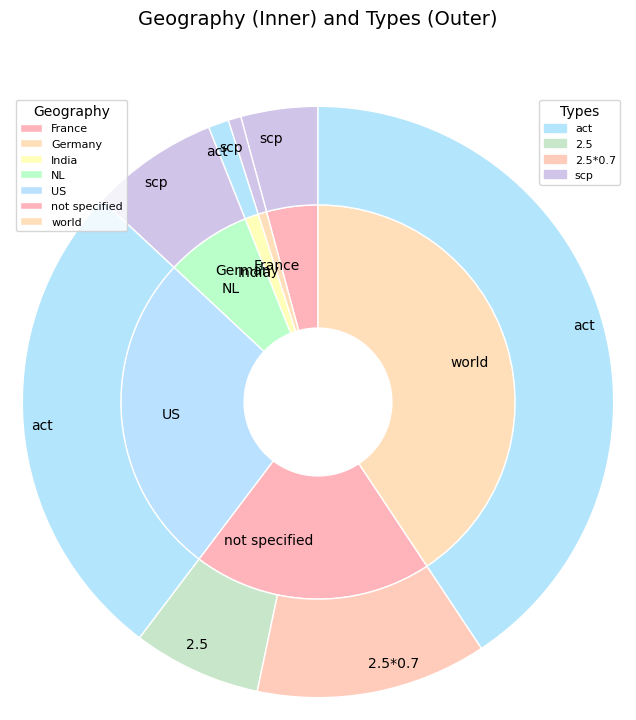

In [118]:
import matplotlib.pyplot as plt

# Replace NaN values in 'geography' and 'type' with 'not specified'
df['geography'] = df['geography'].fillna('not specified')
df['type'] = df['type'].fillna('not specified')

# Group by 'geography' and calculate the sum of 'amount'
grouped_geography = df.groupby('geography')['amount'].sum()

# Group by 'geography' and 'type' to calculate the sum of 'amount'
grouped_type = df.groupby(['geography', 'type'])['amount'].sum()

# Define pastel colors for the inner pie (geography)
pastel_colors_inner = ['#FFB3BA', '#FFDFBA', '#FFFFBA', '#BAFFC9', '#BAE1FF']

# Define a color palette for the outer pie (type)
outer_colors = ['#B3E5FC', '#C8E6C9', '#FFCCBC', '#D1C4E9', '#F8BBD0', '#F0F4C3']

# Create the figure
plt.figure(figsize=(8, 8))

# Plot the inner pie chart (geography)
plt.pie(
    grouped_geography,
    labels=grouped_geography.index,  # Labels for geography
    startangle=90,
    colors=pastel_colors_inner,    # you may want to comment this out to see bright colors instead
    radius=0.8,  # Inner radius
    wedgeprops=dict(width=0.5, edgecolor='w'),  # Donut style
    pctdistance=1.25, labeldistance=.7
)


# Prepare data for the outer pie chart
outer_sizes = []
outer_labels = []
outer_colors_list = []

for geography in grouped_geography.index:
    # Get the type distribution for the current geography
    type_distribution = grouped_type.loc[geography]
    outer_sizes.extend(type_distribution.values)
    outer_labels.extend(type_distribution.index)
    outer_colors_list.extend([type_color_mapping[type] for type in type_distribution.index])  # Assign consistent colors

# Plot the outer pie chart (type within each geography)
plt.pie(
    outer_sizes,
    labels=outer_labels,  # Labels for types
    startangle=90,
    colors=outer_colors_list,  # Use consistent color mapping
    radius=1.2,  # Outer radius
    wedgeprops=dict(width=0.4, edgecolor='w'),
    pctdistance=1.25, labeldistance=.9
)

# Add the first legend for the inner pie chart (geography)
legend_geography = plt.legend(
    labels=grouped_geography.index,  # Labels for geography (inner donut)
    loc="upper left",  # Position the legend
    fontsize=8,  # Adjust font size
    title="Geography"  # Title for the legend
)

"""
# Add the second legend for the outer pie chart (types)
legend_types = plt.legend(
    labels=list(type_color_mapping.keys()),  # Labels for types
    loc="upper right",  # Position the legend
    fontsize=8,  # Adjust font size
    title="Types"  # Title for the legend
)
"""

import matplotlib.patches as mpatches

# Create legend handles for the types and their colors
type_legend_handles = [mpatches.Patch(color=color, label=type) for type, color in type_color_mapping.items()]

# Add the legend to the plot
legend_types = plt.legend(
    handles=type_legend_handles,  # Use the handles created above
    loc="upper right",  # Position the legend
    fontsize=8,  # Adjust font size for compact display
    title="Types"  # Title for the legend
)


# Add the geography legend back to the plot
plt.gca().add_artist(legend_geography)

# Add a title
plt.title('Geography (Inner) and Types (Outer)', fontsize=14, y=1.1)

# Show the plot
plt.show()
